In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile

In [2]:
%matplotlib inline

In [3]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['figure.figsize'] = [20, 8]
mpl.rcParams['axes.titlecolor'] = 'Grey'

### Gradiente descendente para a descoberta de valores se parâmetros ótimos

In [4]:
X_poly = np.linspace(-3, 5, 81)
print(X_poly[:5], '...' , X_poly[-5:])

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


Text(0.0, 1.0, 'Error surface')

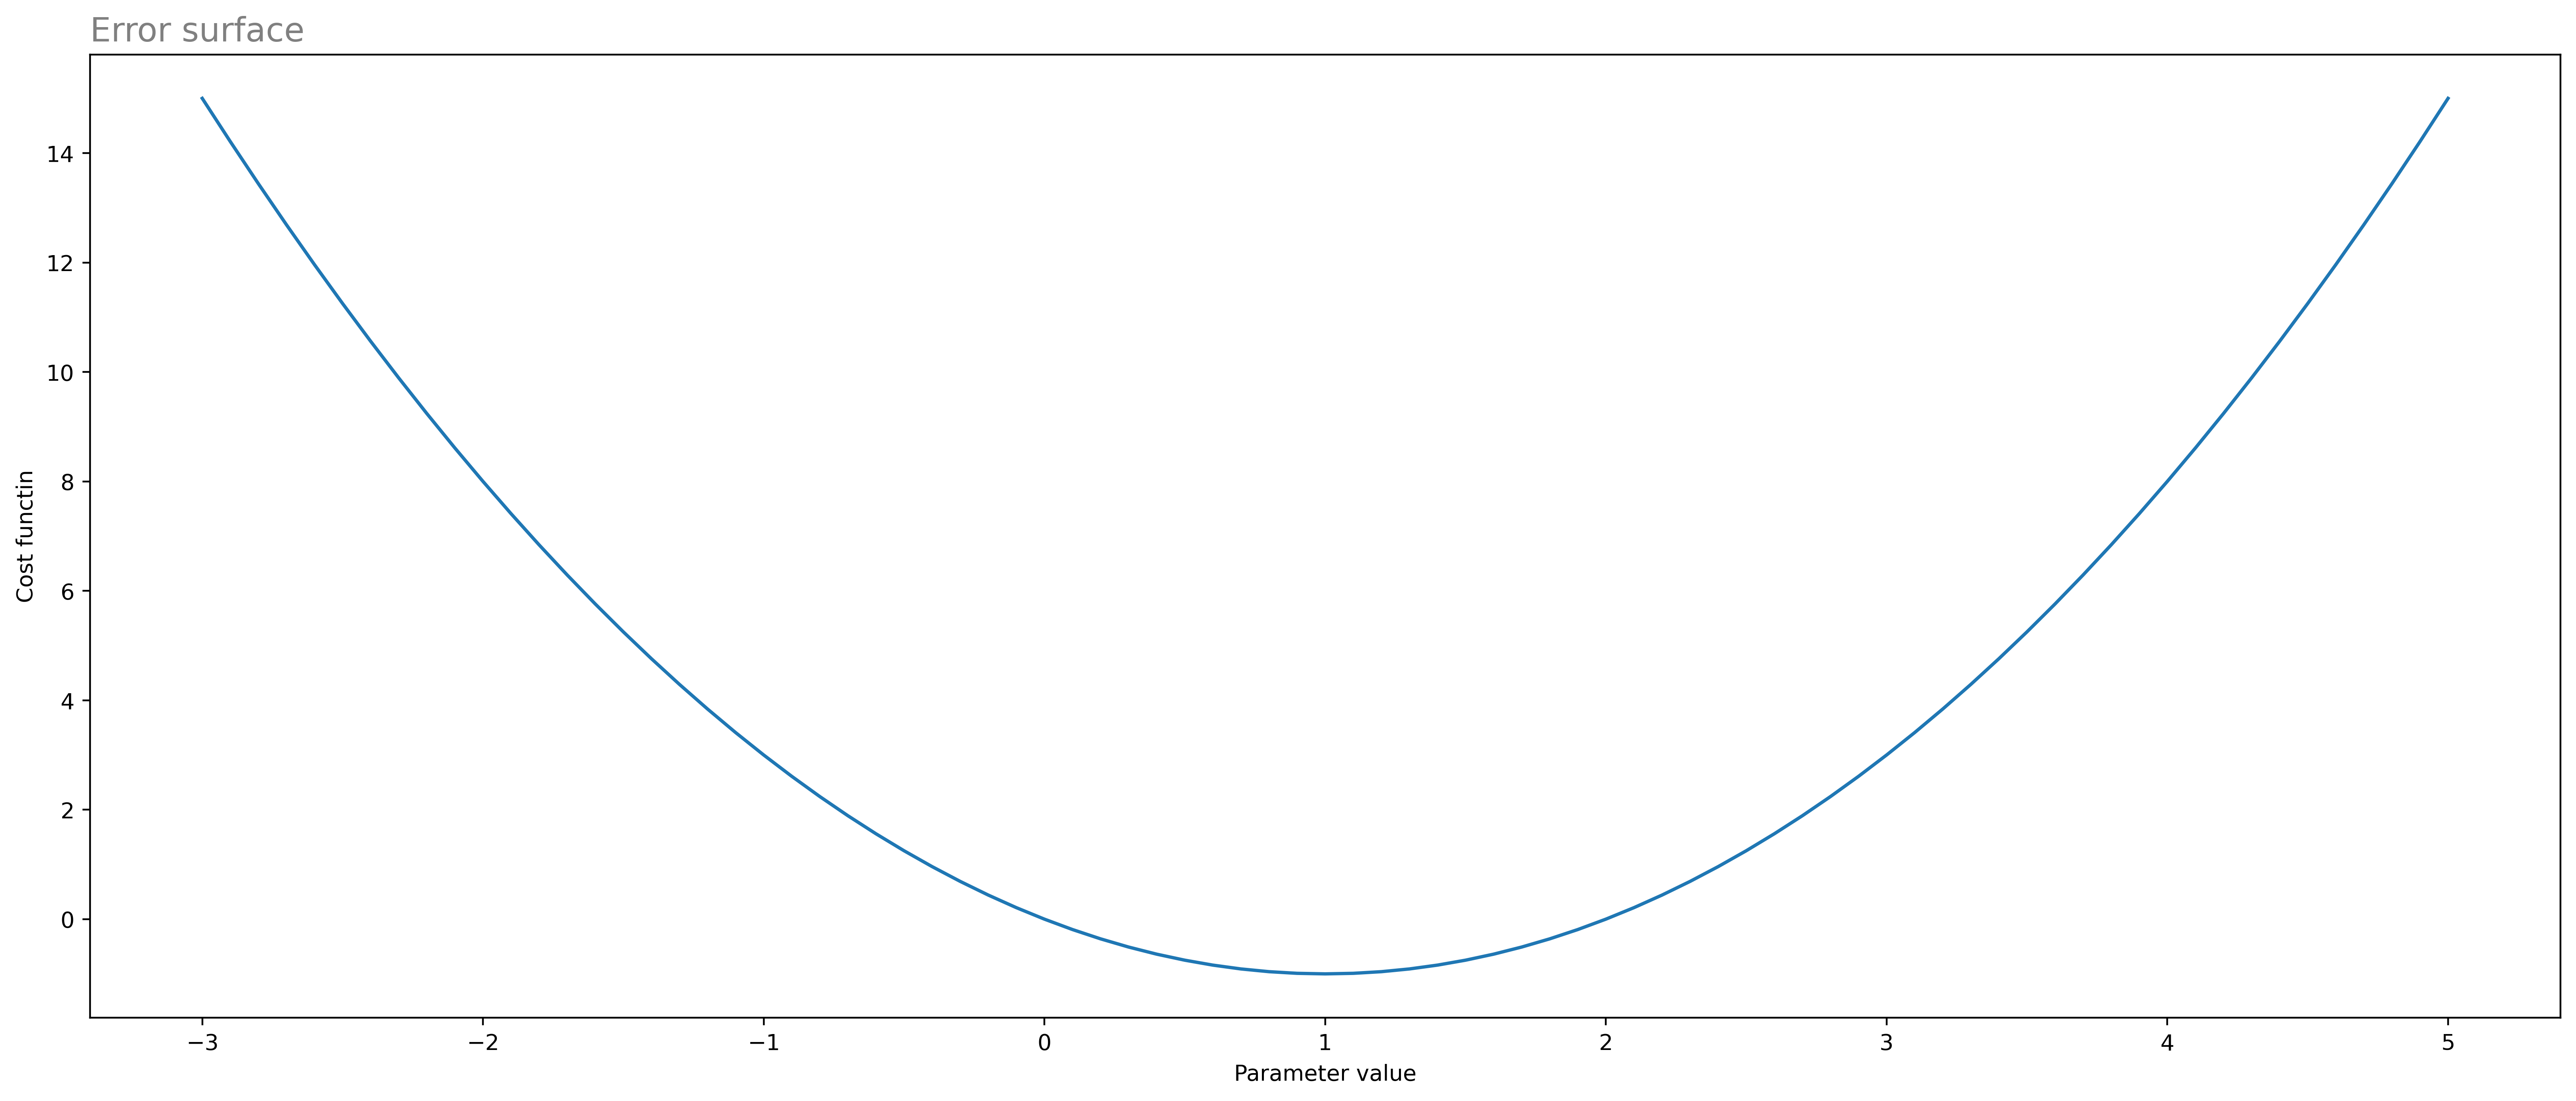

In [5]:
def cost_function(X):
    return X * (X-2)

y_poly = cost_function(X_poly)

plt.plot(X_poly, y_poly)
plt.xlabel("Parameter value")
plt.ylabel("Cost functin")
plt.title("Error surface",
          loc= 'left',
          fontsize= 15)

In [6]:
def gradient(X):
    return (2*X) - 2
x_start = 4.5
learning_rate = 0.75
x_next = x_start - gradient(x_start)*learning_rate
x_next

-0.75

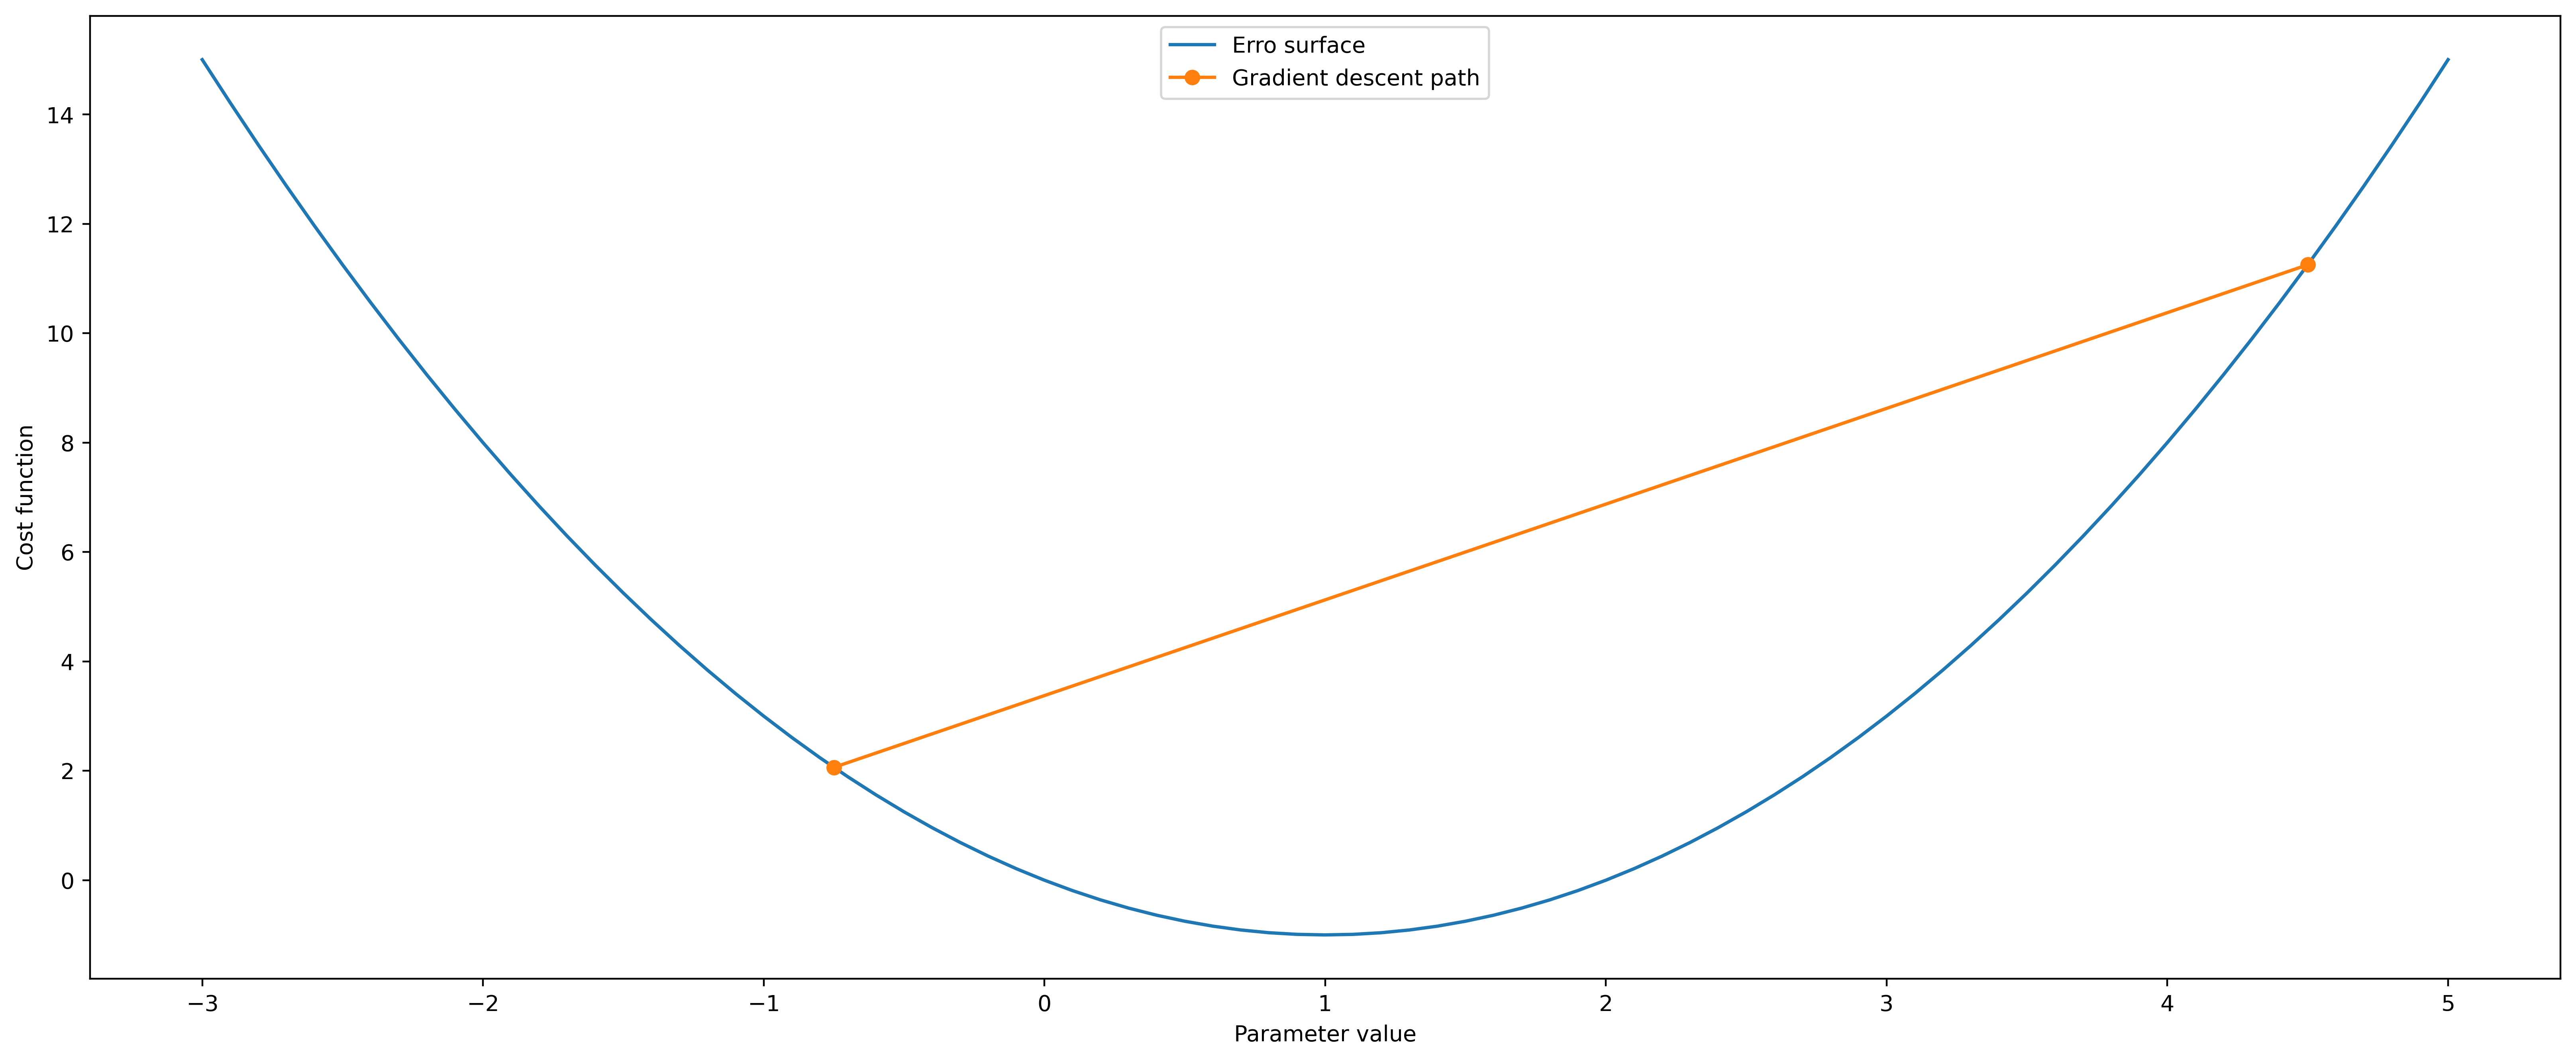

In [8]:
plt.plot(X_poly, y_poly)
plt.plot([x_start, x_next], 
         [cost_function(x_start), cost_function(x_next)],
         '-o')
plt.xlabel("Parameter value")
plt.ylabel("Cost function")
plt.legend(["Erro surface",
            "Gradient descent path"],
           loc= 'upper center')

In [11]:
iterations = 15
x_path = np.empty(iterations,)
x_path[0] = x_start

for iteration_count in range(1, iterations):
    derivative = gradient(x_path[iteration_count-1])
    x_path[iteration_count] = x_path[iteration_count-1] - (derivative*learning_rate)

x_path

array([ 4.5       , -0.75      ,  1.875     ,  0.5625    ,  1.21875   ,
        0.890625  ,  1.0546875 ,  0.97265625,  1.01367188,  0.99316406,
        1.00341797,  0.99829102,  1.00085449,  0.99957275,  1.00021362])

<ipython-input-13-3e80aaccd3b0>:7: UserWarning: Legend does not support 'E' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Error surface",
<ipython-input-13-3e80aaccd3b0>:7: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Error surface",
<ipython-input-13-3e80aaccd3b0>:7: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Error surface",
<ipython-input-13-3e80aaccd3b0>:7: UserWarning: Legend does not support ' ' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.

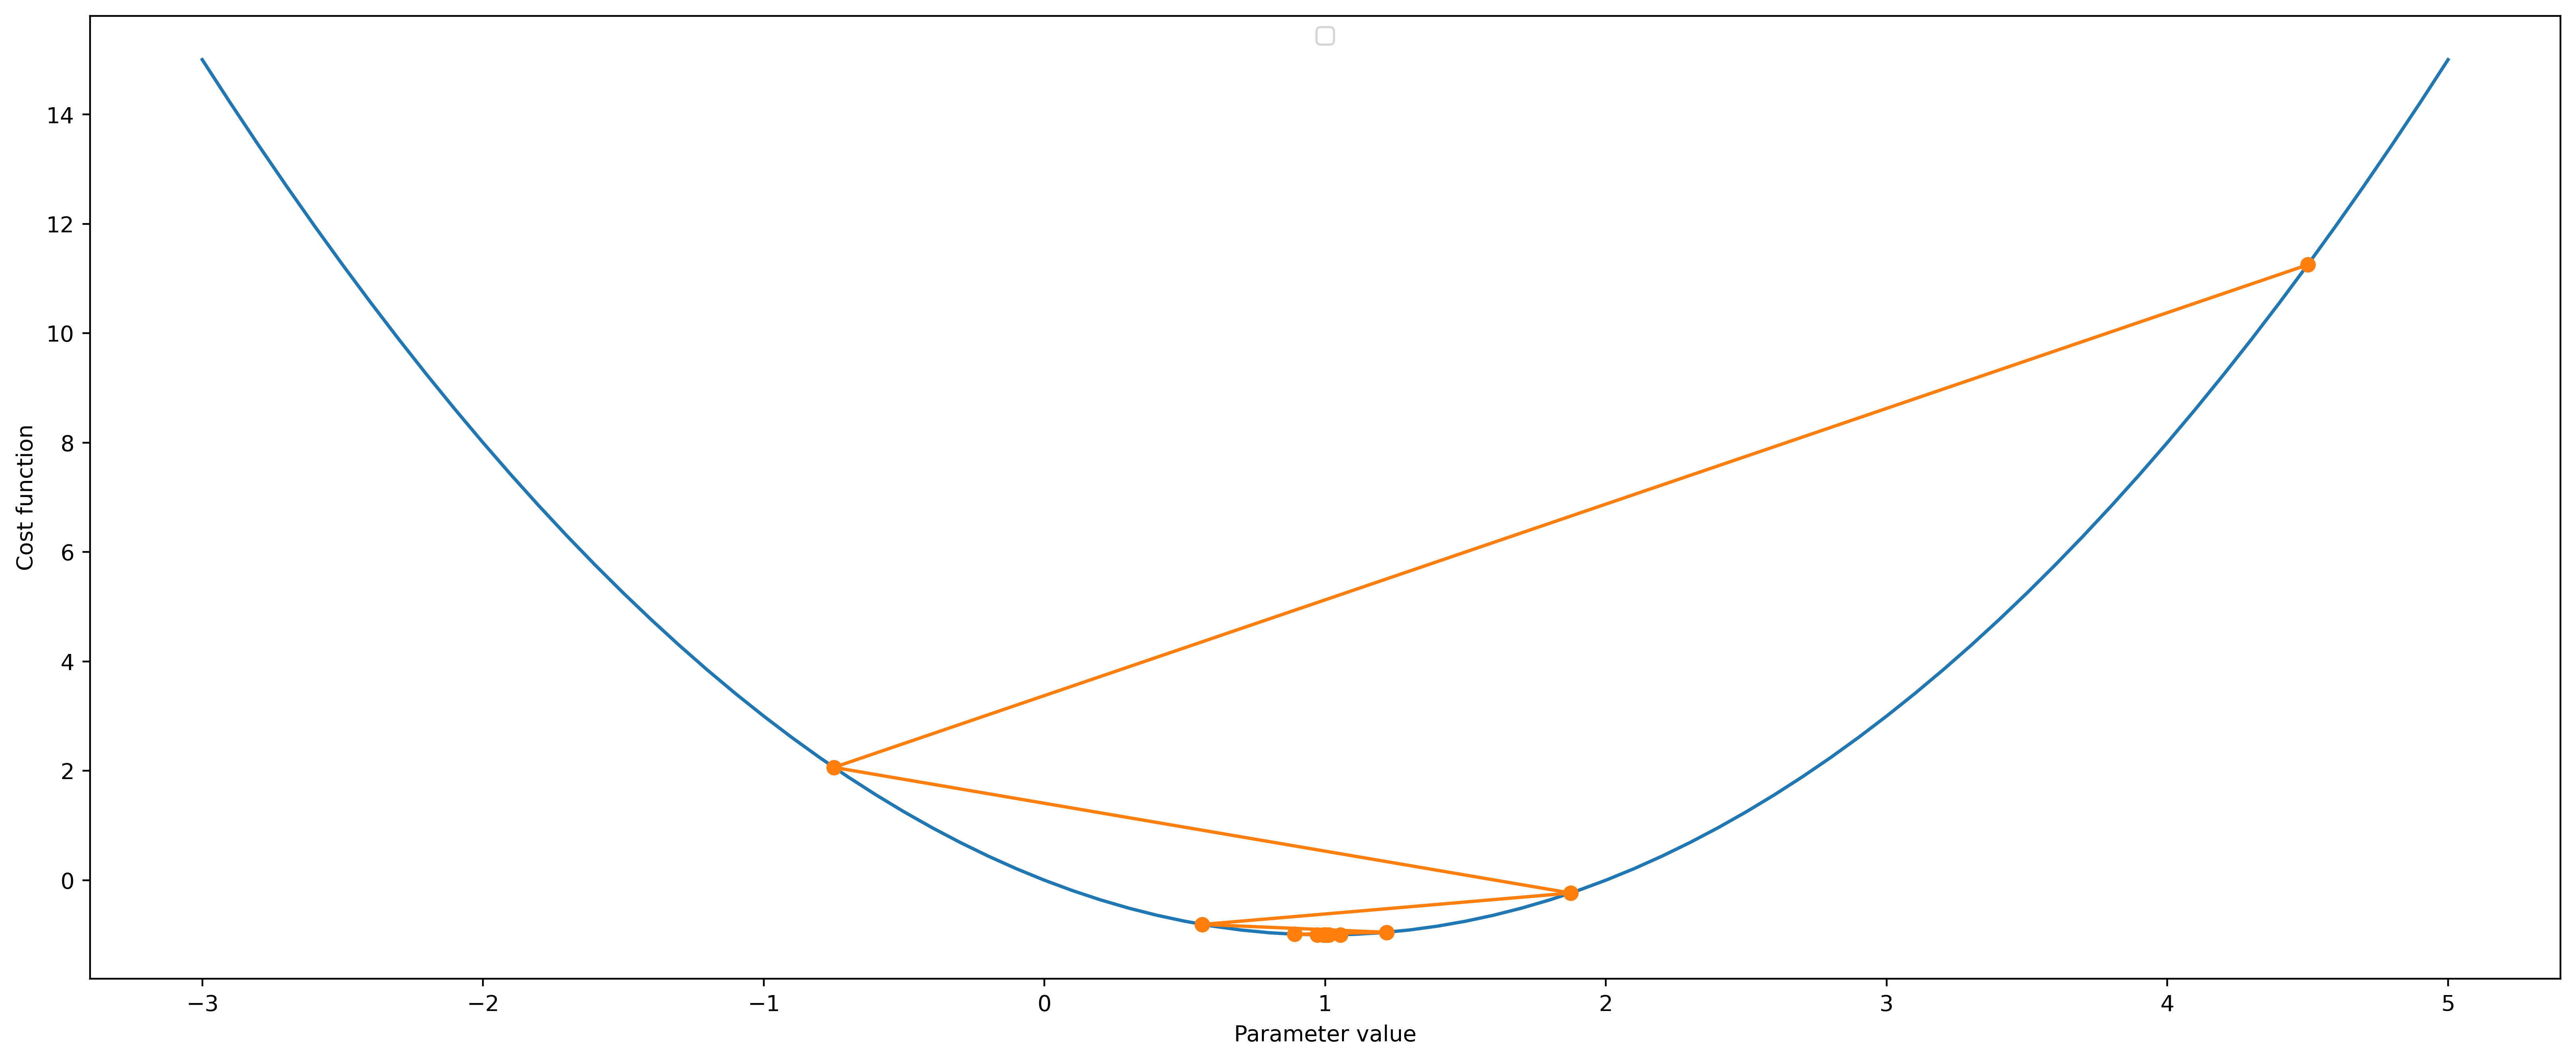

In [13]:
plt.plot(X_poly, y_poly)
plt.plot(x_path, 
         cost_function(x_path), 
         '-o')
plt.xlabel("Parameter value")
plt.ylabel("Cost function")
plt.legend("Error surface",
           "Gradient descent path",
           loc= 'upper center')